In [1]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

## CONSTANTE DE TEMPS

In [2]:
def load(filename: str):
    return pd.read_csv(filename)

In [3]:
huile1_haut = load('../data/huile1_haut.csv')
huile1_bas = load('../data/huile1_bas.csv')
huile2_haut = load('../data/huile2_haut.csv')
huile2_bas = load('../data/huile2_bas.csv')

In [4]:
def sel_dist(arr: np.ndarray, dist: float) -> np.ndarray:
    idx = [0]
    for i, n in enumerate(arr[1:]):
        if abs(n - arr[idx[-1]]) > dist:
            idx.append(i+1)
    return np.array(idx)

In [5]:
def calc_tau(datas, densite):
    v_inf = distance_top_bottom / (unp.uarray(datas['Temps 2 [s]'], delta_t) - unp.uarray(datas['Temps 1 [s]'], delta_t))
    # Equilibre des forces
    # g(m - 4/3 pi r^3 densite_huile) - trainée = 0
    temp = 6 * np.pi * bille_rayon * v_inf
    eta = g * (bille_masse - densite * 4/3 * np.pi * bille_rayon**3) / temp
    
    tau = bille_masse/(6*np.pi*eta*bille_rayon)
    return tau

In [6]:
def calc_diff(datas, densite):
    tau = calc_tau(datas, densite)
    # diff = tau - unp.uarray(datas['Temps 1 [s]'], delta_t)
    diff = unp.uarray(datas['Temps 1 [s]'], delta_t)/tau
    return diff

In [7]:
def plot_and_print_tau(datas, densite, tol=1e-8, color=None, label=None):
    tau = calc_tau(datas, densite)
    T = unp.uarray(datas['Temperature [C]']+273.15, delta_T)

    idx_to_plot = sel_dist(T, tol)
    x = T[idx_to_plot]
    y = tau[idx_to_plot]

    plt.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color, label=label)

In [8]:
axins_temp = ...


def plot_and_print_diff(datas, densite, tol=1e-8, color=None, label=None, zoom=False, axins=axins_temp):
    diff = calc_diff(datas, densite)
    T = unp.uarray(datas['Temperature [C]']+273.15, delta_T)

    idx_to_plot = sel_dist(T, tol)
    x = T[idx_to_plot]
    y = diff[idx_to_plot]
    
    print(np.min(y))
    
    plt.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color, label=label)
    
    if zoom:
        axins.errorbar(nom_vals(x), nom_vals(y), xerr=std_devs(x), yerr=std_devs(y), ls='none', color=color)
        # axins.grid()

## Graff

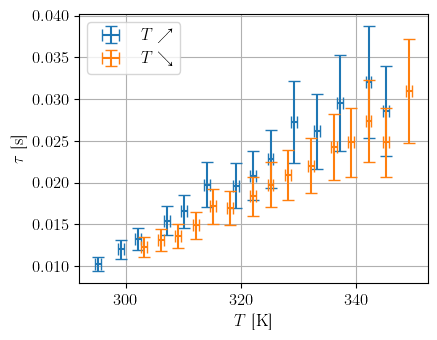

In [9]:
plot_and_print_tau(huile1_haut, densite_1, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_tau(huile1_bas, densite_1, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$\tau$ [\si{\second}]')
plt.legend()
plt.grid()
# plt.savefig('../figures/huile1_tau.pdf')

60+/-14
59+/-13


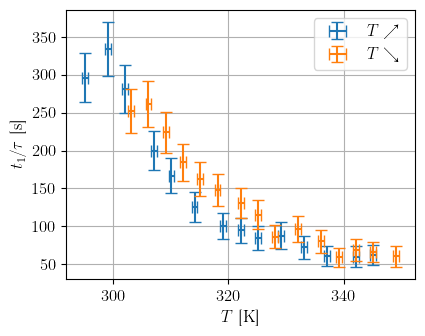

In [10]:
plot_and_print_diff(huile1_haut, densite_1, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_diff(huile1_bas, densite_1, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$t_1 / \tau$ [\si{\second}]')
plt.legend()
plt.grid()
plt.savefig('../figures/huile1_tau.pdf')

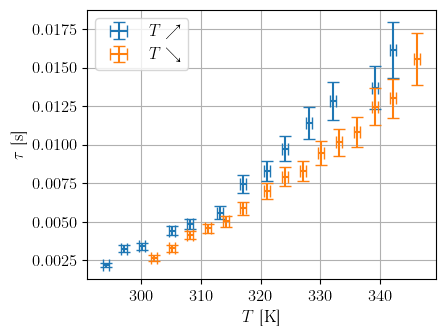

In [11]:
plot_and_print_tau(huile2_haut, densite_2, 2, label='$T\\nearrow$', color='tab:blue')
plot_and_print_tau(huile2_bas, densite_2, 2, label='$T\\searrow$', color='tab:orange')
plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$\tau$ [\si{\second}]')
plt.legend()
plt.grid()
# plt.savefig('../figures/huile2_tau.pdf')

250+/-31
258+/-31


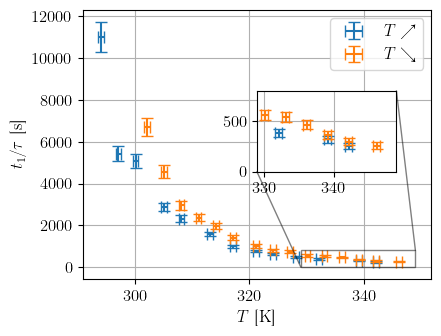

In [17]:
x1, x2, y1, y2 = 329, 349, 0, 800
axins = plt.gca().inset_axes(
    [0.5, 0.4, 0.4, 0.3],
    xlim=(x1, x2), ylim=(y1, y2)
)
axins.grid()




plot_and_print_diff(huile2_haut, densite_2, 2, label='$T\\nearrow$', color='tab:blue', zoom=True, axins=axins)
plot_and_print_diff(huile2_bas, densite_2, 2, label='$T\\searrow$', color='tab:orange', zoom=True, axins=axins)

plt.gca().indicate_inset_zoom(axins, edgecolor="black")


plt.xlabel(r'$T$ [\si{\kelvin}]')
plt.ylabel(r'$t_1 / \tau$ [\si{\second}]')
plt.legend()
plt.grid()
plt.savefig('../figures/huile1_tau.pdf')